In [1]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images,test_labels) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
print('train_images shape:', train_images.shape) #50000 rows 32x32 pixels with depth = 3(RGB)
print('train_labels shape:', train_labels.shape) #50,000 rows, 1 column
print('test_images shape:', test_images.shape) #10,000 rows 32x32 pixels with depth = 3(RGB)
print('test_labels shape:', test_labels.shape) #10,000 rows, 1 column

train_images shape: (50000, 32, 32, 3)
train_labels shape: (50000, 1)
test_images shape: (10000, 32, 32, 3)
test_labels shape: (10000, 1)


In [3]:
#1st image of x train in terms of array
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
print(train_labels[:25])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]
 [4]
 [3]
 [6]
 [6]
 [2]]


In [5]:
#actual 1st image of x train 
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

C:\Users\ace_n\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


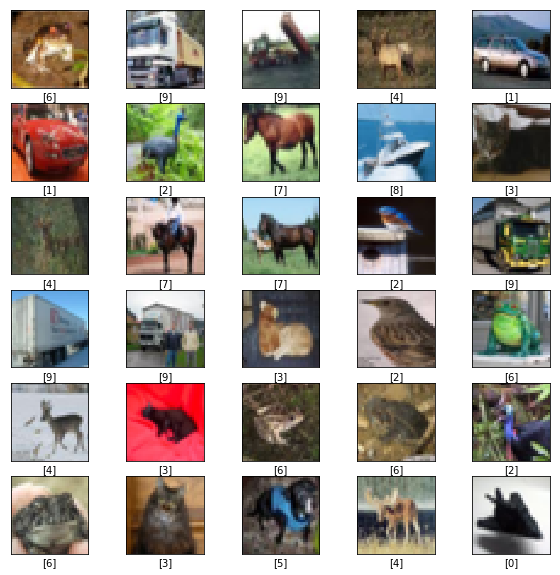

In [6]:
plt.figure(figsize = (10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [7]:
#construct label names
label_names = ['Airplane','Car', 'Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

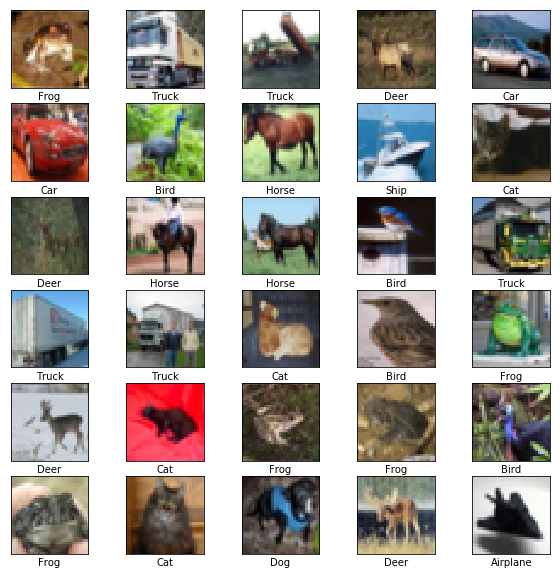

In [8]:
plt.figure(figsize = (10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[int(train_labels[i])])

In [9]:
#One-Hot Encoding 
#For categorical variables where no such ordinal relationship exists,integer encoding(eg 0=airplane) is not enough.
# => model will assume a natural ordering between categories may result in poor performance or unexpected results
# => so need one-hot encoding
#Convert the categorical labels into a set of 10 numbers (as there are 10 labels) to input into the neural network

from keras.utils import to_categorical
onehot_train_labels = to_categorical(train_labels)
onehot_test_labels = to_categorical(test_labels)

In [10]:
print(onehot_train_labels[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
#Normalize pixels of images that range 0-255 to 0-1
#ensure similar distribution of data so the model converges faster
train_images = train_images/255.0
test_images = test_images/255.0

In [12]:
#Build The CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential() 

#Convolution layer to extract features from the input image
#5x5 kernel/filter
#Input shape only in this first layer.
#Number of output channels/convolution filters = 32
#Relu = Max(0,x)
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3))) 

#Use a 2x2 filter to get the max value from the convolved features  
#=> reduces the dimensionality by half e.g. 16x16
model.add(MaxPooling2D(pool_size=(2, 2)))

#2nd Convolution layer with 64 channels
model.add(Conv2D(64, (5, 5), activation='relu'))

#Adding second Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten turns the image a 1D Array
#Dense - Fully connected network
model.add(Flatten())
#a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))
#a layer with 10 output neurons for each label.
#softmax returns 10 probability scores that add up to 1
model.add(Dense(10, activation='softmax')) 

In [13]:
#Compile the model 
#Compile defines the loss function, the optimizer and the metrics which are to be used in the training of the cnn
model.compile(loss='categorical_crossentropy', # loss function used for classes that are greater than 2
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
fitted_model = model.fit(train_images, onehot_train_labels, batch_size=256, epochs=10, validation_split=0.25)

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 136s 4ms/step - loss: 1.6687 - acc: 0.3887 - val_loss: 1.3975 - val_acc: 0.4976
Epoch 2/10
37500/37500 [==============================] - 138s 4ms/step - loss: 1.3034 - acc: 0.5343 - val_loss: 1.2451 - val_acc: 0.5666
Epoch 3/10
37500/37500 [==============================] - 138s 4ms/step - loss: 1.1565 - acc: 0.5936 - val_loss: 1.1482 - val_acc: 0.5996
Epoch 4/10
37500/37500 [==============================] - 139s 4ms/step - loss: 1.0338 - acc: 0.6358 - val_loss: 1.1173 - val_acc: 0.6123
Epoch 5/10
37500/37500 [==============================] - 138s 4ms/step - loss: 0.9646 - acc: 0.6610 - val_loss: 1.0226 - val_acc: 0.6483
Epoch 6/10
37500/37500 [==============================] - 137s 4ms/step - loss: 0.8786 - acc: 0.6940 - val_loss: 1.0269 - val_acc: 0.6434
Epoch 7/10
37500/37500 [==============================] - 137s 4ms/step - loss: 0.8047 - acc: 0.7188 - val_loss: 0.9601 - 

In [18]:
#Get the models accuracy
test_loss, test_acc = model.evaluate(test_images, onehot_test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 13s 1ms/step
Test accuracy: 0.6803
Test loss: 0.9668733665466308


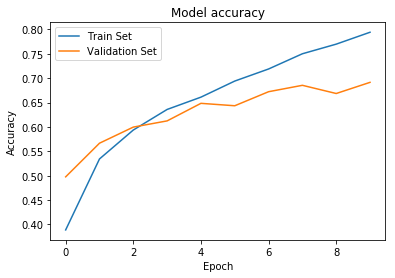

In [16]:
#Visualize the models accuracy
plt.plot(fitted_model.history['acc']) #history just returns the values that you want at each epoch
plt.plot(fitted_model.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Set', 'Validation Set'], loc='upper left')
plt.show()

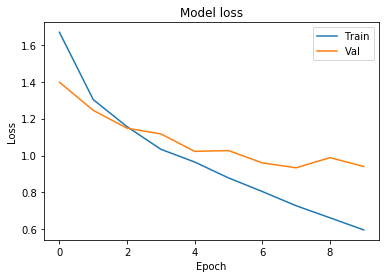

In [17]:
#Visualize the models loss
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([6.9349622e-03, 5.7289988e-04, 2.8327949e-04, 9.2229217e-01,
       1.9499430e-04, 6.1417878e-02, 4.1405382e-03, 1.0056993e-04,
       3.9999075e-03, 6.2718274e-05], dtype=float32)

In [22]:
import numpy as np
np.argmax(predictions[0])

3

In [25]:
print(int(test_labels[0]))

3
